In [1]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv(r"C:\Users\samas\OneDrive\Desktop\ISA Roundtable\AAPL Vs SPX.csv")
df.head(5)


,Date,AAPL,SPX
0,05-02-1993,0.511161,448.93
1,08-02-1993,0.504464,447.85
2,09-02-1993,0.507813,445.33
3,10-02-1993,0.497768,446.23
4,11-02-1993,0.492188,447.66


In [42]:
training_set = df.iloc[:int(len(df)*0.95), 2:].values
test_set = df.iloc[int(len(df)*95):, 2:].values

In [43]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [44]:
X_train = []
y_train = []
for i in range(60, 6878):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])


In [45]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [46]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (X_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=1, epochs=1)

6818/6818 [==============================] - 261s 37ms/step - loss: 6.8574e-04


In [57]:
dataset_train = df.iloc[:int(len(df)*0.95), 2:]
dataset_test = df.iloc[int(len(df)*0.95):, 2:]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 422):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(362, 60, 1)


In [58]:
predicted_stock_return = model.predict(X_test)
predicted_stock_return = sc.inverse_transform(predicted_stock_return)

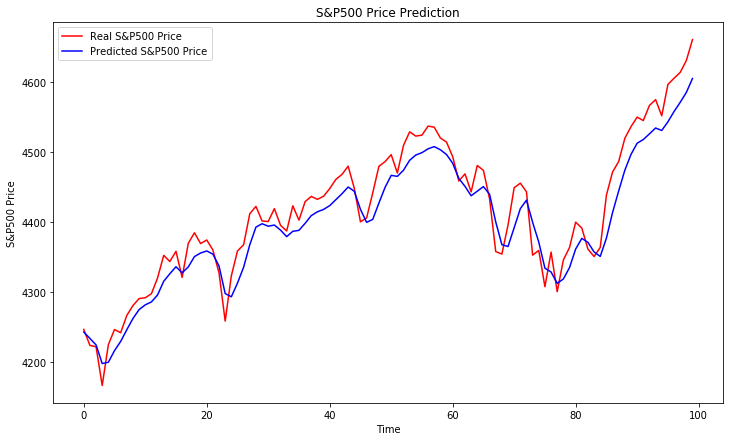

In [55]:
plt.figure(figsize=(12,7))
plt.plot(dataset_test['SPX'][-100:].values, color = 'red', label = 'Real S&P500 Price')
plt.plot(predicted_stock_return[-100:], color = 'blue', label = 'Predicted S&P500 Price')
plt.title('S&P500 Price Prediction')
plt.xlabel('Time')
plt.ylabel('S&P500 Price')
plt.legend()
plt.show()

In [59]:
mse = np.mean(((predicted_stock_return - df.iloc[int(len(df)*0.95):, 2:] ) ** 2))
mse

SPX    1955.666326
dtype: float64

In [53]:
predicted_stock_return[-2:]

array([[4585.037],
       [4604.979]], dtype=float32)

In [54]:
return_pred = ((4604.979 - 4585.037)/4585.037) * 100
return_pred

0.4349365119627171